In [2]:
# Question 4.2 a
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X= iris.data
y=iris.target

# a) randomly split data into train, validation and test
X_train_o, X_test, y_train_o, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_o, y_train_o, test_size=0.34, random_state=42) # 0.34 x 0.75 = 0.25

#Question about the randomly chosen

"""

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)



"""


"""

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5
ratio_val = 0.25
ratio_test = 0.25

# Produces test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(
    x, y, test_size=test_ratio)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)
Since the remaining dataset is reduced after the first split, new ratios with respect to the reduced dataset must be calculated by solving the equation:

Rremaining⋅Rnew=Rold



"""


'\n\n# Defines ratios, w.r.t. whole dataset.\nratio_train = 0.5\nratio_val = 0.25\nratio_test = 0.25\n\n# Produces test split.\nx_remaining, x_test, y_remaining, y_test = train_test_split(\n    x, y, test_size=test_ratio)\n\n# Adjusts val ratio, w.r.t. remaining dataset.\nratio_remaining = 1 - ratio_test\nratio_val_adjusted = ratio_val / ratio_remaining\n\n# Produces train and val splits.\nx_train, x_val, y_train, y_val = train_test_split(\n    x_remaining, y_remaining, test_size=ratio_val_adjusted)\nSince the remaining dataset is reduced after the first split, new ratios with respect to the reduced dataset must be calculated by solving the equation:\n\nRremaining⋅Rnew=Rold\n\n\n\n'

[0.9743589743589743, 0.9743589743589743, 0.9743589743589743]


Text(0, 0.5, 'validation set scores')

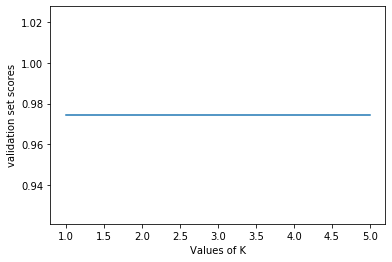

In [5]:
# 4.2 (b)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#k_range = range(1,25)
k_range = [1,3,5]
#scores = {}
score_list = []
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    score_list.append(metrics.accuracy_score(y_val,y_pred))
print(score_list)
import matplotlib.pyplot as plt
plt.plot(k_range,score_list )
plt.xlabel("Values of K")
plt.ylabel("validation set scores")

In [7]:
# 4.2 c

from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, param_grid, scoring = 'accuracy')
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)



0.9323809523809524
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


1.0


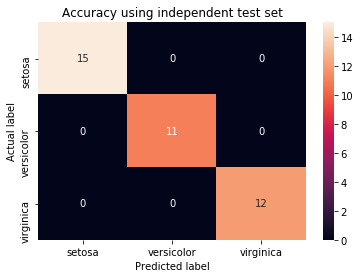

In [8]:
# 4.2 d generalisation error

knn= KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_o,y_train_o)
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using independent test set'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



In [59]:
# 4.3 e

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X= iris.data
y=iris.target

# a) randomly split data into train, validation and test
X_train_o, X_test, y_train_o, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_o, y_train_o, test_size=0.34, random_state=42)

#model selection
knn = KNeighborsClassifier(n_neighbors=8)
print(cross_val_score(knn, X_train_o, y_train_o, cv=5, scoring='accuracy').mean())

#.96

logreg = LogisticRegression()
print(cross_val_score(logreg, X_train_o, y_train_o, cv=5, scoring='accuracy').mean())

#.97

# https://www.ritchieng.com/machine-learning-cross-validation/
knn.fit(X_train_o,y_train_o)
y_pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_knn))

logreg.fit(X_train_o,y_train_o)
y_pred_logreg = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_logreg))




0.9375494071146246
0.9636363636363636
1.0
1.0


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
x = [1,3,5]
for i in x:
    print(i)

1
3
5
